# Markov Chain Monte Carlo
Lets implement an MCMC sampler using the Metropolis-Hasting algorithm.

In [1]:
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt
%matplotlib inline

Here's some pseudo code for the Metropolis algorithm (symmetric proposal)
```
# initialize the current state x_0
x = x_0
samples[0] = x

for i in range(1, S): # S samples 

    # sample from the proposal
    x' ~ q(x'| x)

    # calculate acceptance rate
    r = min(1, p(x') / p(x))

    # accept or reject
    u ~ U(0,1)
    if r > u: # accept
        x = x'
    else: 
        x = x
    samples[i] = x
```

Let's say we want to sample from a bimodal distribution

In [2]:
_p0 = sp.stats.norm(loc=1, scale=6)
_p1 = sp.stats.norm(loc=-2, scale=1)
def p(x): 
    return 0.5*(_p0.pdf(x) + _p1.pdf(x))

In [11]:
def proposal_sample(x, scale=1): 
    # sample proposal distribution x'~q(x'|x)
    q = sp.stats.norm(loc=x, scale=scale)
    return q.rvs()

In [12]:
def mcmc_mh(S=10000, x_0=0, scale=1):
    samples = []
    
    x = x_0 
    samples.append(x) 
    for i in range(1, S): 
        x_p = proposal_sample(x, scale=scale)
        r = np.min([1, p(x_p) / p(x)])
    
        u = np.random.uniform()
    
        if r > u: 
            x = x_p 
        samples.append(x)
    return samples 

In [13]:
samples = mcmc_mh()

Text(0, 0.5, '$p(x)$')

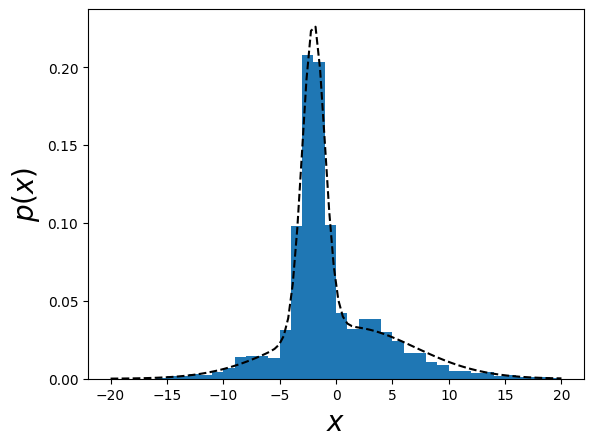

In [14]:
plt.hist(samples, range=(-20, 20), bins=40, density=True)
plt.plot(np.linspace(-20, 20, 100), p(np.linspace(-20, 20, 100)), c='k', ls='--')
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$p(x)$', fontsize=20)

# impact of proposal distribution $\sigma$ 

In [17]:
samples0 = mcmc_mh(S=1000, scale=0.1)
samples1 = mcmc_mh(S=1000, scale=10.)
samples2 = mcmc_mh(S=1000, scale=100.)

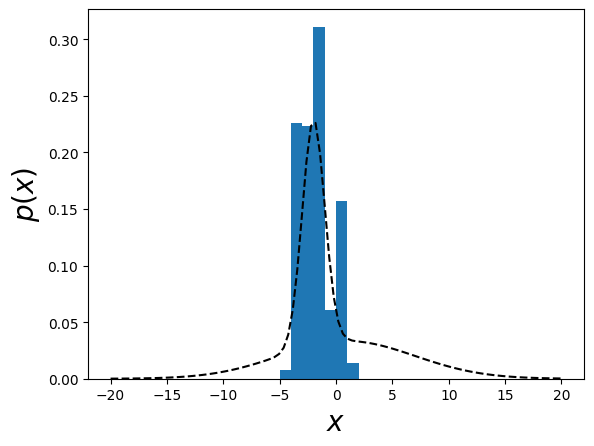

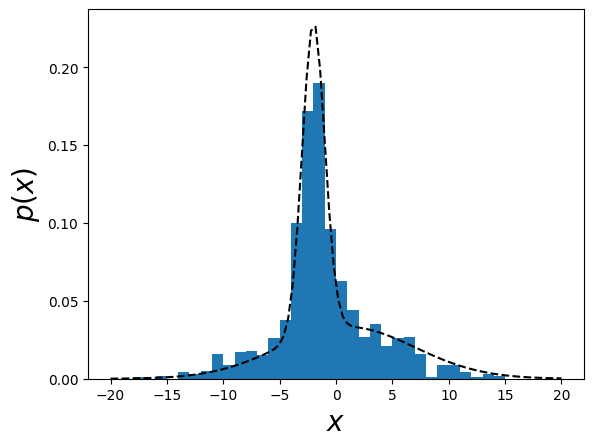

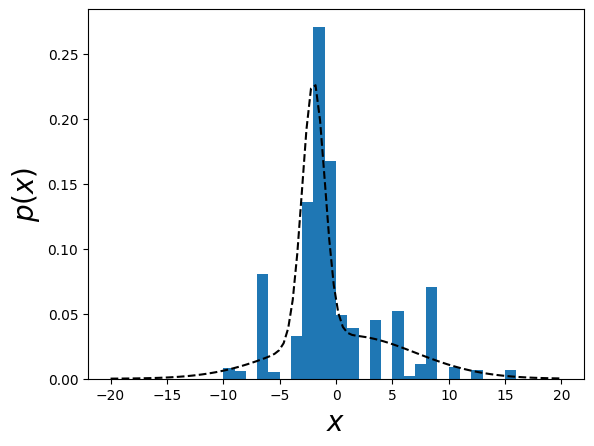

In [18]:
for _samples in [samples0, samples1, samples2]: 
    plt.hist(_samples, range=(-20, 20), bins=40, density=True)
    plt.plot(np.linspace(-20, 20, 100), p(np.linspace(-20, 20, 100)), c='k', ls='--')
    plt.xlabel('$x$', fontsize=20)
    plt.ylabel('$p(x)$', fontsize=20)
    plt.show()

If the variance is too low (top panel), the chain will only explore one of the modes, but if the variance is too large (bottom panel), most of the proposed samples will be rejected as they will lead to a much lower probability state, and the chain stay in the same state for a long time. They don’t contribute to an efficient proposal.